In [31]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter, defaultdict
import pprint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  1151k      0 --:--:--  0:00:21 --:--:-- 1213k


In [3]:
with open('turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [6]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [7]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

In [8]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}

In [13]:
#print (datetime_cumulative.keys()[0])
#datetime_cumulative[datetime_cumulative.keys()][0]

In [14]:
for rows in datetime_cumulative.values():
    assert rows == sorted(rows)

In [15]:
[(i,j)   for i in range(5) for j in range(3,6)]

[(0, 3),
 (0, 4),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 3),
 (4, 4),
 (4, 5)]

In [16]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [17]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
#print all_counts[-50:]

In [18]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
#print Counter(all_times).most_common(10)

In [19]:
dtc = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

In [51]:
x_axis = []
y_axis = []

for k,v in enumerate(dtc.keys()):
    if k == 0:
        x_ax = sorted(dtc[v])
    
for i in range(len(x_ax)):
    x_axis.append(x_ax[i][0])
    y_axis.append(x_ax[i][1])

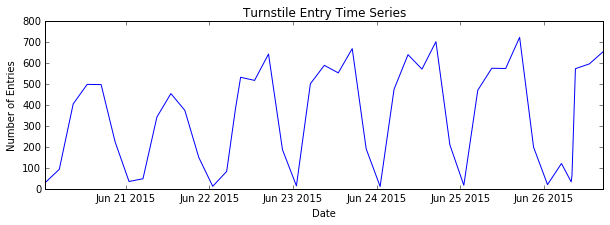

In [52]:
plt.figure(figsize=(10,3))
plt.plot(x_axis, y_axis)
plt.title('Turnstile Entry Time Series')
plt.ylabel('Number of Entries')
plt.xlabel('Date')

In [29]:
cnt_by_days = defaultdict(list)

for key, values in dtc.items():
        by_days = {}
        for time, counts in values:
            dates = time.date()
            by_days[dates] = by_days.get(dates, 0) + counts
        cnt_by_days[(key[0], key[1], key[3])] = sorted(by_days.items())

In [35]:
print(list(cnt_by_days.keys())[0])
pprint.pprint(list(cnt_by_days.values())[0])

('R238', 'R046', '42 ST-GRD CNTRL')
[(datetime.date(2015, 6, 20), 804),
 (datetime.date(2015, 6, 21), 708),
 (datetime.date(2015, 6, 22), 2074),
 (datetime.date(2015, 6, 23), 2355),
 (datetime.date(2015, 6, 24), 2191),
 (datetime.date(2015, 6, 25), 2167),
 (datetime.date(2015, 6, 26), 1931)]


In [36]:
cnt_by_station = defaultdict(list)

for key, values in dtc.items():
    by_station = {}
    for time, counts in values:      
        dates = time.date()
        by_station[dates] = by_station.get(dates, 0) + counts  
    cnt_by_station[key[3]] = sorted(by_station.items())

In [49]:
print(list(cnt_by_station.keys())[0])
pprint.pprint(list(cnt_by_station.values())[0])


121 ST
[(datetime.date(2015, 6, 20), 318),
 (datetime.date(2015, 6, 21), 235),
 (datetime.date(2015, 6, 22), 364),
 (datetime.date(2015, 6, 23), 377),
 (datetime.date(2015, 6, 24), 387),
 (datetime.date(2015, 6, 25), 384),
 (datetime.date(2015, 6, 26), 371)]


In [44]:
x_axis1 = []
y_axis1 = []

for k,v in enumerate(cnt_by_station.keys()):
    if k == 0:
        x_ax = sorted(cnt_by_station[v])
    
for i in range(len(x_ax)):
    x_axis1.append(x_ax[i][0])
    y_axis1.append(x_ax[i][1])

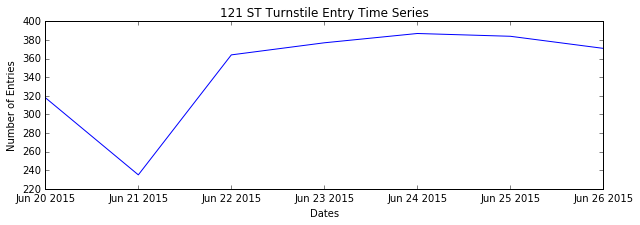

In [47]:
plt.figure(figsize=(10,3))
plt.plot(x_axis1, y_axis1)
plt.title(list(cnt_by_station.keys())[0]+' '+'Turnstile Entry Time Series')
plt.ylabel('Number of Entries')
plt.xlabel('Dates')